# Bird Classifications

### Table of contents
01. [README](#README)
02. [Downloading & Extracting Dataset](#dataset)
03. [Installing Tensorflow Addons](#installingtensorflowaddons)
04. [Importing Libraries](#importinglibraries)
05. [Loading Training & Validation Set](#loadingtraining&validationset)
06. [Saving Model Checkpoints](#savingmodelcheckpoints)
07. [ResNet V2](#resnetv2)
    * [Network Initialization](#networkinitialization)
    * [Network Summary](#networksummary)
    * [Compiling The Network](#networkcompiling)
    * [Training The Network](#networktraining)
    * [Evaluating ResNet On Test Set](#testsetevaluation)
    * [Loss Value For Training & Validation Set](#lossvalue)
    * [Accuracy For Training & Validation Set](#accuracy)
08. [Inception ResNet V2](#inceptionresnetv2)
    * [Network Initialization](#networkinitialization)
    * [Network Summary](#networksummary)
    * [Compiling The Network](#networkcompiling)
    * [Training The Network](#networktraining)
    * [Evaluating ResNet On Test Set](#testsetevaluation)
    * [Loss Value For Training & Validation Set](#lossvalue)
    * [Accuracy For Training & Validation Set](#accuracy)
09. [Evaluating Saved Model On Test Set](#evaluation)
10. [Confusion Matrix](#confusionmatrix)
11. [Classifying Bird Images](#classifyingbirdimages)
    * [Creating Dictionary For Classes](#classesdictionary)
    * [Loading Random Bird Images](#randomimages)
    * [Predicting Using Saved Model](#savedmodelprediction)
    * [Showing The Results](#results)

### README

**Points to Follow** <br>

* You will need `Jupyter Notebook` or `Google Collab` to run the code

* Before downloading you have to change the path from `/content/CSC8637-Deep-Learning/Dataset` to your folder's path in `! wget` & `! unzip` command

* After downloading the dataset you have to change the `path` variable with your folder path where you downloaded the dataset.
             

```
: path -> Dataset -> train
                     test
                     valid
```



* You can modify this variable `path_2` with the path of the folder where you want to store the model check points. 


```
 : path_2 -> Model Checkpoint -> Model.h5
```


* To load the model you need to specify the path of the folder where you have stored the model in the `path_3` variable


```
 : path_3 -> Saved Model -> InceptionResNetV2.h5
```



* In this varaiable `path_4` you need to mention the path of the image you want to do prediction on.


```
 : path_4 -> Random Images -> Wood Duck.jpg 
```


   After making the mentioned changes you will be able to run this code. 


### Downloading & Extracting Dataset

In [ ]:
! wget -P /content/CSC8637-Deep-Learning/Dataset http://homepages.cs.ncl.ac.uk/stephen.mcgough/Teaching/birds.zip  # Downloading Dataset

--2022-02-25 07:48:15--  http://homepages.cs.ncl.ac.uk/stephen.mcgough/Teaching/birds.zip
Resolving homepages.cs.ncl.ac.uk (homepages.cs.ncl.ac.uk)... 128.240.212.24
Connecting to homepages.cs.ncl.ac.uk (homepages.cs.ncl.ac.uk)|128.240.212.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658039182 (1.5G) [application/zip]
Saving to: ‘/content/CSC8637-Deep-Learning/Dataset/birds.zip’

birds.zip           100%[===================>]   1.54G  1002KB/s    in 27m 44s 

2022-02-25 08:15:59 (973 KB/s) - ‘/content/CSC8637-Deep-Learning/Dataset/birds.zip’ saved [1658039182/1658039182]



In [ ]:
# Intializing the Variable with Path

path = '/content/CSC8637-Deep-Learning/Dataset/' 
path_2 = '/content/CSC8637-Deep-Learning/Model Checkpoint/'
path_3 = '/content/CSC8637-Deep-Learning/Saved Model/'
path_4 = '/content/CSC8637-Deep-Learning/Random Images/'

In [ ]:
! unzip '/content/CSC8637-Deep-Learning/Dataset/birds.zip' -d '/content/CSC8637-Deep-Learning/Dataset' # Extracting Dataset

### Installing Tensorflow Addons

In [ ]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.9 MB/s 


### Importing Libraries

In [ ]:
# Basics
import tensorflow
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

# Saving
from keras.callbacks import ModelCheckpoint

# Pretrained Network
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

# Evaluation
import cv2
from keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score
from keras.models import load_model
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix

In [ ]:
tf.random.set_seed(42) # Initializing Random Number Generator

### Loading Training & Validation Test

In [ ]:
Images = ImageDataGenerator(rescale = 1/255) # Reading The Images

# Loading Training Set With Size of '128 x 128'
Train = Images.flow_from_directory(path + 'train', target_size = (128, 128), batch_size = 130) 

# Loading Validation Set With Size of '128 x 128'
Validation = Images.flow_from_directory(path + 'valid', target_size = (128, 128), batch_size = 130) 

# Loading Test Set With Size of '128 x 128'
Test = Images.flow_from_directory(path + 'test', target_size = (128, 128), batch_size = 130, shuffle = False)

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


### Saving Model Checkpoints

In [ ]:
Model_Checkpoint = ModelCheckpoint(filepath = path_2 + "Model.h5", 
                                   verbose = 2, save_best_only = True) # Using 'ModelCheckpoint()' to Save The Best Model 

Callback = [Model_Checkpoint] # Intializing 'Callback' for Implementing it in the Model

### ResNet V2

###### Network Initializing

In [ ]:
# Initializing 'ResNet 50'
ResNet = tf.keras.applications.ResNet50( include_top = False, weights="imagenet", input_tensor=None, input_shape = (128, 128, 3)) 

ResNet_Output = ResNet.output # Storing the Output
Res = tf.keras.layers.Flatten()(ResNet_Output) # 'Flatten' Layer 
Dense = tf.keras.layers.Dense(4048,activation = "relu")(Res) # 'Dense' Layer
Output = tf.keras.layers.Dense(units = 250, activation = "softmax")(Dense) # 'Output' Layer

Model = tf.keras.models.Model(inputs = ResNet.inputs, outputs = Output) # Implementing the Model

94781440/94765736 [==============================] - 1s 0us/step


###### Network Summary

In [ ]:
Model.summary()

###### Compiling The Network

In [ ]:
Adam = keras.optimizers.Adam(learning_rate = 0.0001) # Intializing the Learning Rate

Model.compile(loss = "categorical_crossentropy", optimizer = Adam, metrics = [F1Score(250), Precision(), Recall(), "accuracy"]) # Compiling the Network

###### Training The Network

In [ ]:
Resnet = Model.fit(Train, epochs = 10, validation_data = (Validation), callbacks = Callback)

Epoch 1/10
271/271 [==============================] - ETA: 0s - loss: 1.5297 - f1_score: 0.6613 - precision_4: 0.8490 - recall_4: 0.5975 - accuracy: 0.6666
Epoch 1: val_loss did not improve from 0.18790
271/271 [==============================] - 94s 311ms/step - loss: 1.5297 - f1_score: 0.6613 - precision_4: 0.8490 - recall_4: 0.5975 - accuracy: 0.6666 - val_loss: 6.8097 - val_f1_score: 3.2362e-05 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_accuracy: 0.0040
Epoch 2/10
271/271 [==============================] - ETA: 0s - loss: 0.0840 - f1_score: 0.9782 - precision_4: 0.9841 - recall_4: 0.9723 - accuracy: 0.9786
Epoch 2: val_loss did not improve from 0.18790
271/271 [==============================] - 82s 300ms/step - loss: 0.0840 - f1_score: 0.9782 - precision_4: 0.9841 - recall_4: 0.9723 - accuracy: 0.9786 - val_loss: 5.8584 - val_f1_score: 0.0072 - val_precision_4: 0.2222 - val_recall_4: 0.0016 - val_accuracy: 0.0136
Epoch 3/10
271/271 [==============================

###### Evaluating ResNet On Test Set

In [ ]:
Res_Test = Model.evaluate(Test, verbose = 1)

10/10 [==============================] - 2s 219ms/step - loss: 0.2375 - f1_score: 0.9388 - precision_4: 0.9520 - recall_4: 0.9368 - accuracy: 0.9400


###### Loss Value For Training & Validation Set

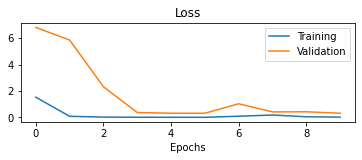

In [ ]:
pyplot.subplot(211) # Grouping Axes
pyplot.title('Loss') # Title of The Plot
pyplot.xlabel('Epochs') # 'X-Axis' Title

pyplot.plot(Resnet.history['loss'], label = 'Training') # Plotting Loss Value for Training Set
pyplot.plot(Resnet.history['val_loss'], label = 'Validation') # Plotting Loss Value for Test Set

# Showing the Plot
pyplot.legend()
pyplot.show()

###### Accuracy For Training & Validation Set

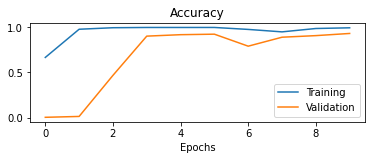

In [ ]:
pyplot.subplot(212) # Grouping Axes
pyplot.title('Accuracy') # Title of The Plot
pyplot.xlabel('Epochs') # 'X-Axis' Title

pyplot.plot(Resnet.history['accuracy'], label = 'Training') # Plotting Accuracy for Training Set
pyplot.plot(Resnet.history['val_accuracy'], label = 'Validation') # Plotting Accuracy for Validation Set

# Showing the Plot
pyplot.legend()
pyplot.show()

# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

### Inception ResNet V2

###### Initializing Network

In [ ]:
# Initializing 'Inception ResNet V2'
Inception_ResNet = tf.keras.applications.InceptionResNetV2( include_top = False, weights="imagenet", input_tensor=None, input_shape = (128, 128, 3))

Incep_ResNet_Output = Inception_ResNet.output # Storing the Output
Res_Inc = tf.keras.layers.Flatten()(Incep_ResNet_Output) # 'Flatten' Layer 
Dense_Inc = tf.keras.layers.Dense(4048,activation = "relu")(Res_Inc) # 'Dense' Layer
Output_Inc = tf.keras.layers.Dense(units=250, activation = "softmax")(Dense_Inc) # 'Output' Layer

Model_1 = tf.keras.models.Model(inputs = Inception_ResNet.inputs, outputs = Output_Inc) # Implementing the Model

###### Network Summary

In [ ]:
Model_1.summary()

###### Compiling The Network

In [ ]:
Adam_Ince = keras.optimizers.Adam(learning_rate = 0.0001) # Initializing Learning Rate

Model_1.compile(loss = "categorical_crossentropy", optimizer = Adam_Ince, metrics = [F1Score(250), Precision(), Recall(), "accuracy"]) # Compiling the Model

###### Training The Model

In [ ]:
Resnet_Inc = Model_1.fit(Train, epochs = 5, validation_data = (Validation), callbacks = Callback)

Epoch 1/5
271/271 [==============================] - ETA: 0s - loss: 1.9601 - f1_score: 0.5800 - precision_1: 0.8816 - recall_1: 0.4657 - accuracy: 0.5817
Epoch 1: val_loss did not improve from 0.25162
271/271 [==============================] - 140s 432ms/step - loss: 1.9601 - f1_score: 0.5800 - precision_1: 0.8816 - recall_1: 0.4657 - accuracy: 0.5817 - val_loss: 0.3661 - val_f1_score: 0.8863 - val_precision_1: 0.9299 - val_recall_1: 0.8592 - val_accuracy: 0.8912
Epoch 2/5
271/271 [==============================] - ETA: 0s - loss: 0.2609 - f1_score: 0.9284 - precision_1: 0.9598 - recall_1: 0.9049 - accuracy: 0.9298
Epoch 2: val_loss did not improve from 0.25162
271/271 [==============================] - 108s 397ms/step - loss: 0.2609 - f1_score: 0.9284 - precision_1: 0.9598 - recall_1: 0.9049 - accuracy: 0.9298 - val_loss: 0.2754 - val_f1_score: 0.9171 - val_precision_1: 0.9472 - val_recall_1: 0.9048 - val_accuracy: 0.9200
Epoch 3/5
271/271 [==============================] - ETA: 0s -

###### Evaluating Inception ResNet 50 On Test Set

In [ ]:
Res_Inc_Test = Model_1.evaluate(Test, verbose = 1) # Evaluation on Test Set

10/10 [==============================] - 2s 236ms/step - loss: 0.1862 - f1_score: 0.9638 - precision_1: 0.9749 - recall_1: 0.9616 - accuracy: 0.9640


###### Loss Value For Training & Validation Set

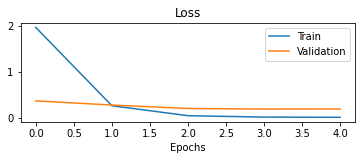

In [ ]:
pyplot.subplot(211) # Grouping Axes
pyplot.title('Loss') # Plot Title
plt.xlabel('Epochs') # 'X-Axis' Title

pyplot.plot(Resnet_Inc.history['loss'], label = 'Train') # Plotting Loss Value for Training Set
pyplot.plot(Resnet_Inc.history['val_loss'], label = 'Validation') # Plotting Loss Value for Validation Set

# Showing the Plot
pyplot.legend()
pyplot.show()

###### Accuracy For Training & Validation Set

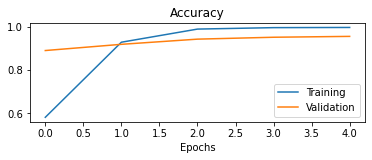

In [ ]:
pyplot.subplot(212) # Grouping Axes
pyplot.title('Accuracy') # Plot Title
pyplot.xlabel('Epochs') # 'X-Axis' Title 

pyplot.plot(Resnet_Inc.history['accuracy'], label = 'Training') # Plotting Accuracy for Training Set
pyplot.plot(Resnet_Inc.history['val_accuracy'], label = 'Validation') # Plotting Accuracy for Validation Set

# Showing the Plot
pyplot.legend()
pyplot.show()

# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

### Evaluating Saved Model On Test Set

In [ ]:
Test_Model = load_model(path_3 + 'InceptionResNetV2.h5') # Loading the Saved Model
Test_Model.evaluate(Test, verbose = 1) # Evaluating the Saved Model

### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (Predicted Values vs Actual Values)')

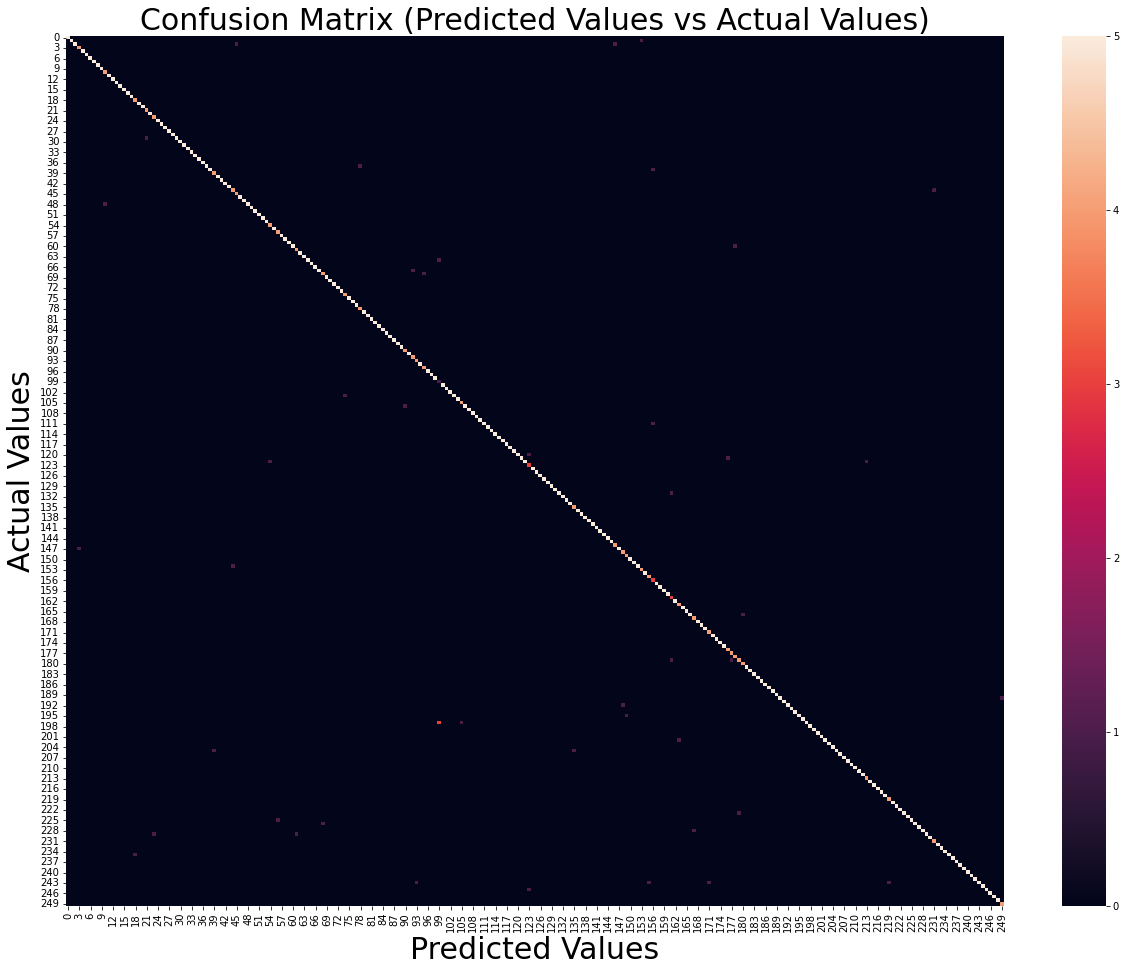

In [ ]:
Prec = np.argmax(Test_Model.predict(Test), axis = -1) # Prediction
classes = Test.classes # Extracting the Classes

Conf = confusion_matrix(Prec, classes) # Confusion Matrix

# Plotting Confusion Matrix to Heat Map
plt.figure(figsize = (21,16)) # Plot Figure
sns.heatmap(Conf, fmt='') # Heatmap
plt.xlabel('Predicted Values', fontsize = 30) # Title for 'X-Axis'
plt.ylabel('Actual Values', fontsize =30) # Title for 'Y-Axis'
plt.title('Confusion Matrix (Predicted Values vs Actual Values)', fontsize = 30) # Plot Title 

### Classifying Bird Images

###### Creating Dictionary For Classes

In [ ]:
Classes = Test.class_indices # Getting Indexes
Dictionary = {i:u for u,i in Classes.items()} # Extracting Class Names
print(Dictionary) # Displaying The Names

{0: 'AFRICAN CROWNED CRANE', 1: 'AFRICAN FIREFINCH', 2: 'ALBATROSS', 3: 'ALEXANDRINE PARAKEET', 4: 'AMERICAN AVOCET', 5: 'AMERICAN BITTERN', 6: 'AMERICAN COOT', 7: 'AMERICAN GOLDFINCH', 8: 'AMERICAN KESTREL', 9: 'AMERICAN PIPIT', 10: 'AMERICAN REDSTART', 11: 'ANHINGA', 12: 'ANNAS HUMMINGBIRD', 13: 'ANTBIRD', 14: 'ARARIPE MANAKIN', 15: 'ASIAN CRESTED IBIS', 16: 'BALD EAGLE', 17: 'BALI STARLING', 18: 'BALTIMORE ORIOLE', 19: 'BANANAQUIT', 20: 'BANDED BROADBILL', 21: 'BAR-TAILED GODWIT', 22: 'BARN OWL', 23: 'BARN SWALLOW', 24: 'BARRED PUFFBIRD', 25: 'BAY-BREASTED WARBLER', 26: 'BEARDED BARBET', 27: 'BELTED KINGFISHER', 28: 'BIRD OF PARADISE', 29: 'BLACK FRANCOLIN', 30: 'BLACK SKIMMER', 31: 'BLACK SWAN', 32: 'BLACK THROATED WARBLER', 33: 'BLACK VULTURE', 34: 'BLACK-CAPPED CHICKADEE', 35: 'BLACK-NECKED GREBE', 36: 'BLACK-THROATED SPARROW', 37: 'BLACKBURNIAM WARBLER', 38: 'BLUE GROUSE', 39: 'BLUE HERON', 40: 'BOBOLINK', 41: 'BROWN NOODY', 42: 'BROWN THRASHER', 43: 'CACTUS WREN', 44: 'CALIFORN

###### Loading Random Bird Images

In [ ]:
Image = cv2.imread(path_4 + "Crowned Crane.jpg") # Reading the Random Bird Image
Image = cv2.resize(Image, (128, 128)) # Resizing the Image

###### Prediction Using Saved Model

In [ ]:
Prediction = Test_Model.predict(1/255*(np.array([Image]))) # Rescaling the Image
Prediction = np.argmax(Prediction) # Extracting the Maximum Class 

###### Showing The Results

Bird: AFRICAN CROWNED CRANE


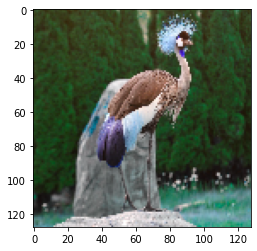

In [ ]:
plt.imshow(Image) # Displaying the Image
print('Bird:', Dictionary[Prediction]) # Printing the Prediction

# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx